In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('seeds.csv')
df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat


In [3]:
df.shape

(210, 8)

In [4]:
df.dtypes

area                     float64
perimeter                float64
compactness              float64
length                   float64
width                    float64
asymmetry_coefficient    float64
groove_length            float64
grain_variety             object
dtype: object

In [5]:
df.describe()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [6]:
df.isnull().sum()

area                     0
perimeter                0
compactness              0
length                   0
width                    0
asymmetry_coefficient    0
groove_length            0
grain_variety            0
dtype: int64

In [7]:
df.duplicated().sum()

0

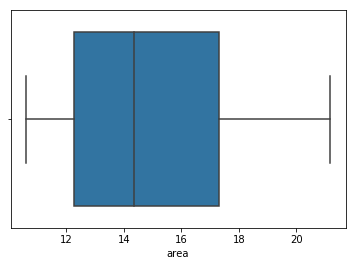

In [8]:
sns.boxplot(df['area'])

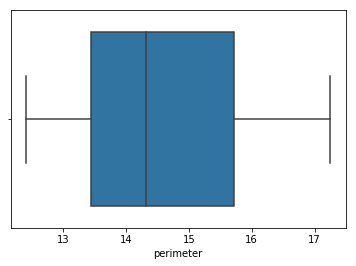

In [9]:
sns.boxplot(df['perimeter'])

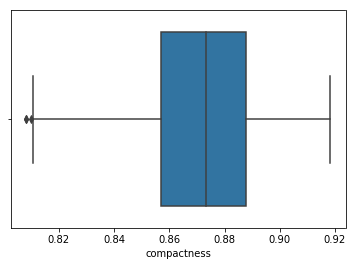

In [10]:
sns.boxplot(df['compactness'])

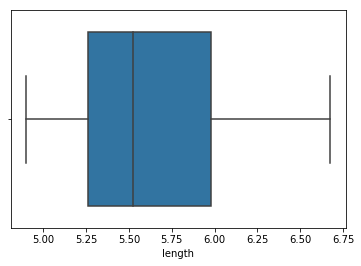

In [11]:
sns.boxplot(df['length'])

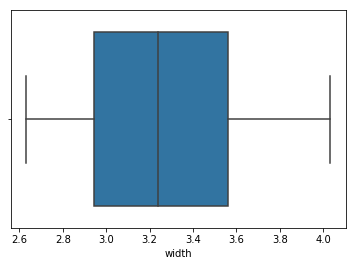

In [12]:
sns.boxplot(df['width'])

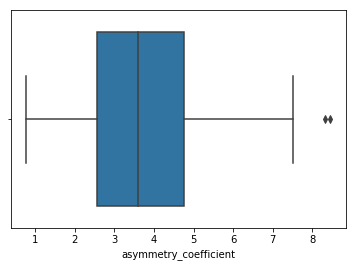

In [13]:
sns.boxplot(df['asymmetry_coefficient'])

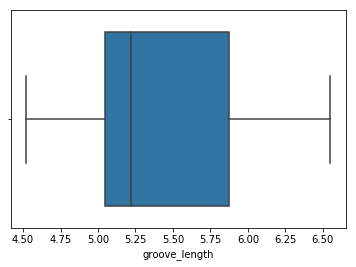

In [14]:
sns.boxplot(df['groove_length'])

In [15]:
Q1 = df['asymmetry_coefficient'].quantile(0.25)
Q3 = df['asymmetry_coefficient'].quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*(IQR)
LL = Q1 - 1.5*(IQR)

In [16]:
UL

8.079625

In [17]:
df['asymmetry_coefficient'] = np.where((df['asymmetry_coefficient']>8), 8.079625,df['asymmetry_coefficient'])

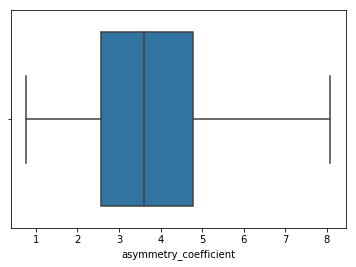

In [18]:
sns.boxplot(df['asymmetry_coefficient'])

In [19]:
Q1 = df['compactness'].quantile(0.25)
Q3 = df['compactness'].quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*(IQR)
LL = Q1 - 1.5*(IQR)

In [20]:
LL

0.8105875

In [21]:
df['compactness'] = np.where((df['compactness']<0.81),0.8105875,df['compactness'])

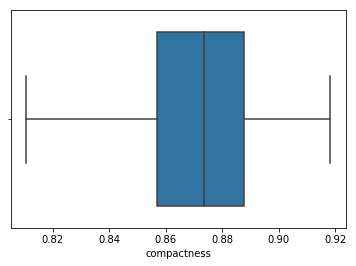

In [22]:
sns.boxplot(df['compactness'])

In [23]:
df.columns

Index(['area', 'perimeter', 'compactness', 'length', 'width',
       'asymmetry_coefficient', 'groove_length', 'grain_variety'],
      dtype='object')

In [24]:
df['grain_variety'].unique()

array(['Kama wheat', 'Rosa wheat', 'Canadian wheat'], dtype=object)

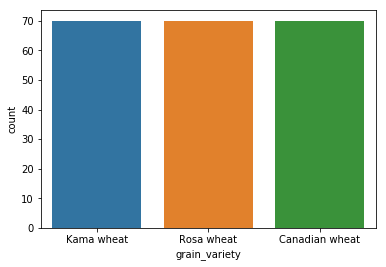

In [25]:
sns.countplot(df['grain_variety'])

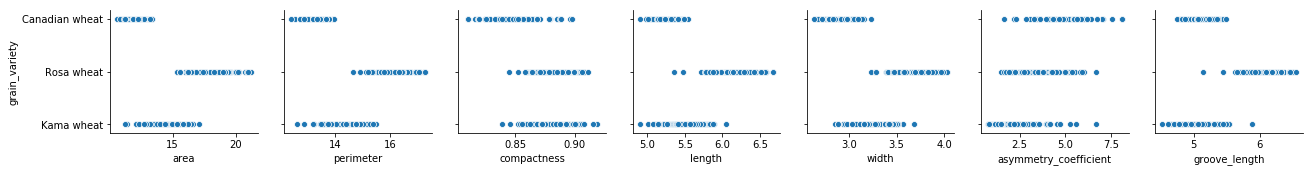

In [26]:
sns.pairplot(x_vars=['area','perimeter','compactness','length','width'
                    ,'asymmetry_coefficient','groove_length'], y_vars='grain_variety',data=df)

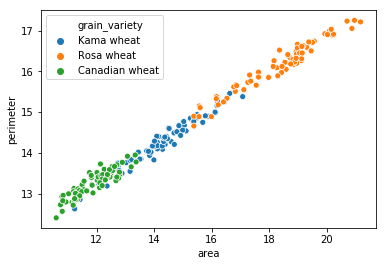

In [27]:
sns.scatterplot('area','perimeter',data=df,hue='grain_variety')

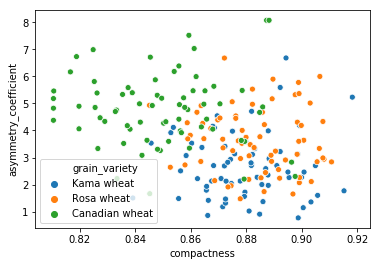

In [28]:
sns.scatterplot('compactness','asymmetry_coefficient',data=df,hue='grain_variety')

In [29]:
varieties = df['grain_variety']
x = df.drop('grain_variety',axis=1)
samples = x.values

In [30]:
from sklearn.cluster import KMeans

In [31]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

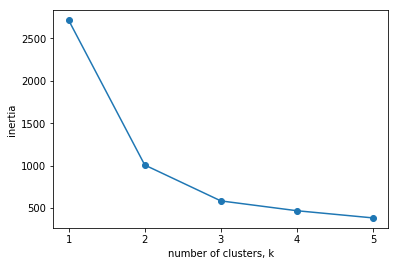

In [32]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [33]:
model = KMeans(n_clusters=3)

In [34]:
labels = model.fit_predict(samples)

In [35]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,68,9,0
1,0,1,60
2,2,60,10


## other way

In [36]:
df = pd.read_csv('seeds.csv')
df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat


In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
lb = LabelEncoder()

In [39]:
df['grain_variety'] = lb.fit_transform(df['grain_variety'])

In [40]:
df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [41]:
df['grain_variety'].unique()

array([1, 2, 0], dtype=int64)

In [42]:
x = np.array(df.drop(['grain_variety'], 1).astype(float))

In [43]:
y = np.array(df['grain_variety'])

In [44]:
kmeans = KMeans(n_clusters=3,random_state=8) # You want cluster the passenger records into 3: canadian,rose or kama
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=8, tol=0.0001, verbose=0)

In [45]:
correct = 0
for i in range(len(x)):
    predict_me = np.array(x[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(x))

0.014285714285714285


our model was able to cluster correctly with a 1.42% (accuracy of your model)

In [46]:
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto',random_state=8)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=8, tol=0.0001, verbose=0)

In [47]:
correct = 0
for i in range(len(x)):
    predict_me = np.array(x[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(x))

0.2619047619047619


In [48]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [49]:
scaler = StandardScaler()

In [50]:
X_scaled = scaler.fit_transform(x)

In [51]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=8, tol=0.0001, verbose=0)

In [52]:
correct = 0
for i in range(len(x)):
    predict_me = np.array(x[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(x))

0.3333333333333333


## Sir Method

In [53]:
df = pd.read_csv('seeds.csv')
df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat


In [54]:
df.shape

(210, 8)

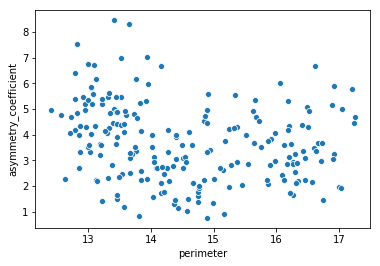

In [55]:
sns.scatterplot(x='perimeter',y='asymmetry_coefficient',data=df)

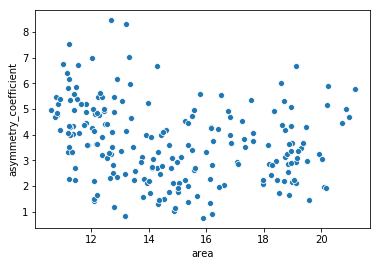

In [56]:
sns.scatterplot(x='area',y='asymmetry_coefficient',data=df)

In [57]:
df.drop(['grain_variety'],1,inplace=True)

In [58]:
df.isnull().sum()

area                     0
perimeter                0
compactness              0
length                   0
width                    0
asymmetry_coefficient    0
groove_length            0
dtype: int64

## Scaling of data (important step)

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scale = sc.fit_transform(df)

## Elbow Method

Wcss - "within cluster sum of square"

No. of Cluster

In [60]:
from sklearn.cluster import KMeans

In [61]:
num_of_cluster = range(1,8)

In [62]:
wcss = []

In [63]:
for k in num_of_cluster:
    # create a KMeans instance with k cluster
    model = KMeans(n_clusters=k, random_state=15)
    # build the model using the data
    model.fit(df_scale)
    # append the inertia (wcss) to the list named 'wcss'
    wcss.append(model.inertia_)

In [64]:
wcss

[1470.0,
 659.1717544870405,
 430.65897315130053,
 371.301721277542,
 326.2665126197038,
 289.77433495935907,
 262.8084469827111]

## Plot the graph between wcss vs no. of cluster

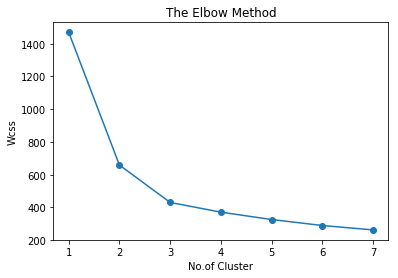

In [65]:
plt.plot(num_of_cluster,wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('No.of Cluster')
plt.ylabel('Wcss') # they count all the data point means 210*7=1470
plt.show()

## Average Silhoutte Plot

In [66]:
from sklearn.metrics import silhouette_score 
num_of_cluster = list(range(2,8))
shc_list = []
for k in num_of_cluster:
    # create a KMeans instance with k cluster
    model = KMeans(n_clusters=k, random_state=15)
    # build the model using the data and predict the cluster
    cluster_labels= model.fit_predict(df_scale)
    shc_list.append(silhouette_score(df_scale,cluster_labels))

In [67]:
shc_list

[0.46577247686580914,
 0.4007270552751299,
 0.3275742660551808,
 0.2881466510357611,
 0.27752587955517594,
 0.2658418662036843]

In [68]:
num_of_cluster.insert(0,1)
shc_list.insert(0,0)

## Plot the graph between silhouette_score vs no. of cluster

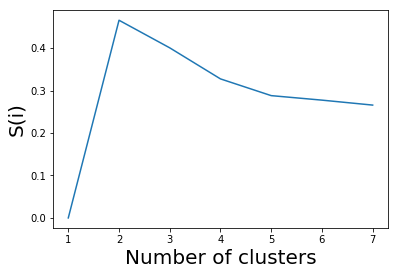

In [69]:
plt.plot(num_of_cluster,shc_list)
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 

## Dendogram method to find optimum no of cluster

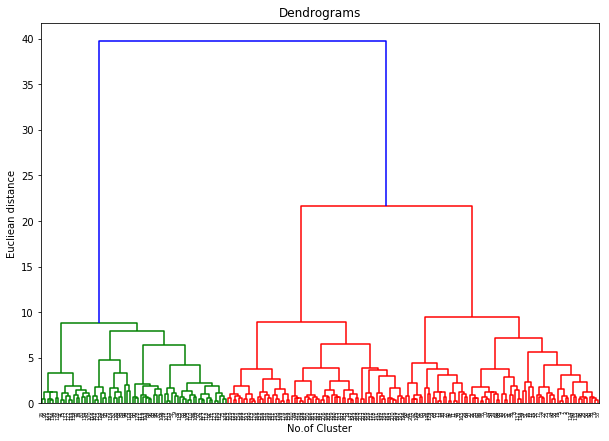

In [70]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms") 
plt.xlabel('No.of Cluster')
plt.ylabel('Eucliean distance')
shc.dendrogram(shc.linkage(df_scale, method='ward'));

Let us build our model using 2 cluster

## K-means clustering

In [71]:
model = KMeans(n_clusters=2, random_state=15)

In [72]:
cluster_labels=model.fit_predict(df_scale)

In [73]:
df['Cluster'] = cluster_labels

In [74]:
df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,Cluster
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [75]:
df[df['Cluster']==1].describe()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,Cluster
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.0
mean,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737,1.0
std,1.428131,0.635028,0.024497,0.208434,0.238913,1.609146,0.199294,0.0
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.855100,4.519000,1.0
25%,11.750000,13.190000,0.847300,5.176000,2.821000,2.587000,4.963000,1.0
50%,12.720000,13.570000,0.865700,5.333000,3.026000,3.638000,5.089000,1.0
75%,14.110000,14.210000,0.881900,5.479000,3.201000,4.924000,5.220000,1.0
max,15.990000,14.940000,0.918300,5.789000,3.582000,8.456000,5.491000,1.0


In [76]:
df.groupby('Cluster').mean()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
Cluster,,,,,,,
0,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740
1,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737


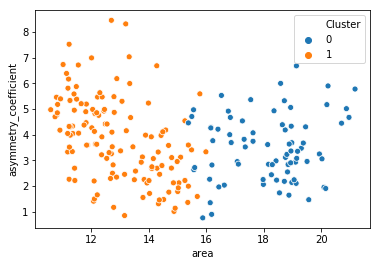

In [77]:
sns.scatterplot('area','asymmetry_coefficient',data=df,hue='Cluster')

In [78]:
df.loc[df['Cluster']==0,'Cluster'] = 'Big Seeds'
df.loc[df['Cluster']==1,'Cluster'] = 'Small Seeds'

In [79]:
df['Cluster'].value_counts()

Small Seeds    133
Big Seeds       77
Name: Cluster, dtype: int64

In [80]:
df.groupby('Cluster').mean()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
Cluster,,,,,,,
Big Seeds,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740
Small Seeds,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737


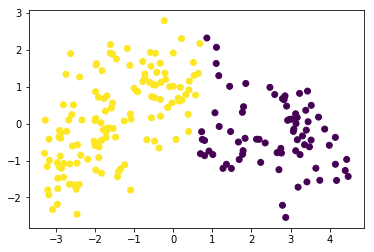

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(df_scale)
plt.scatter(pca[:,0],pca[:,1],c=cluster_labels);

## Hierarchical clustering

In [84]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2)

In [85]:
cluster_labels = model.fit_predict(df_scale)

In [86]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)